# Finding optimal hyper parameters for a CNN model

The point of this notebook is to obtain an optimal set of parameters for our CNN model to process time based series data. Specifically, we are processing IoT data from TON a well-kept dataset from The UNSW Group in Canberra, Australia.

The specific dataset being discussed here is the IoT Garage Door dataset.



We have pip install mealpy each time because it is not a default python package ,and every time the runtime refreshes; the package is uninstalled.

In [ ]:
%pip install mealpy==3.0.1
%pip install -U scikit-learn
%pip install imbalanced-learn
%pip install matplotlib
%pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 18.6 MB/s eta 0:00:00


Our main libraries used are:

*   Imblearn
*   Pandas
*   Matplot Lib
*   MealPy
*   Numpy
*   SKLearn
*   Tensorflow
*   Time



In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from imblearn.combine import SMOTETomek
import numpy
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from mealpy import FloatVar, LCO
import time

# Preparing the Datasets for the CNN Model

We split off the information that indicates whether or not an attack has occured (*label*) and the types of attacks (*type*).
Now there are three dataframes:
  X - all features
  y - attack or not
  y_type - type of attack

We split again into test and train data sets and include some randomness.
**Reset_index** drops the indexes from these new dataframes.
Next, we encode the text data, add another randomness, and scale all dataframes. The X dataframe is reshaped.

In [ ]:
#Uncomment for local use
#raw_data = pandas.read_csv('../../Train_Test_IoT_dataset/Train_Test_IoT_Garage_Door.csv')
#Uncomment for Google Colab
raw_data = pandas.read_csv('Train_Test_IoT_Garage_Door.csv')
X = raw_data.drop(columns=['label','type'])
y = raw_data['label']
y_type = raw_data['type']

In [ ]:
# Binary
X_train, X_testsplit, y_train, y_testsplit = train_test_split(X, y, test_size=0.2, random_state=777)
# Binary validation
X_test, X_validation, y_test, y_validation = train_test_split(X_testsplit, y_testsplit, test_size=0.5, random_state=777)

#drop index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_validation = X_validation.reset_index(drop=True)
y_validation = y_validation.reset_index(drop=True)

In [ ]:
encoder = OrdinalEncoder()
label_encoder = LabelEncoder()
X_train_encode = encoder.fit_transform(X_train)
X_test_encode = encoder.fit_transform(X_test)
y_train_encode = label_encoder.fit_transform(y_train)
y_test_encode = label_encoder.fit_transform(y_test)
X_validation_encode = encoder.fit_transform(X_validation)
y_validation_encode = label_encoder.fit_transform(y_validation)

In [ ]:
encoder = OrdinalEncoder()
label_encoder = LabelEncoder()
X_train_encode = encoder.fit_transform(X_train)
X_test_encode = encoder.fit_transform(X_test)
y_train_encode = label_encoder.fit_transform(y_train)
y_test_encode = label_encoder.fit_transform(y_test)


In [ ]:
smotetomek = SMOTETomek(random_state=777)
X_rebalance, y_rebalance = smotetomek.fit_resample(X_train_encode, y_train_encode)

In [ ]:
scaler = StandardScaler()
X_rebalance = scaler.fit_transform(X_rebalance)
X_test_encode = scaler.transform(X_test_encode)

X_validation_encode = scaler.transform(X_validation_encode)

In [ ]:
X_rebalance = X_rebalance.reshape(X_rebalance.shape[0], X_rebalance.shape[1], 1)
X_test_encode = X_test_encode.reshape(X_test_encode.shape[0], X_test_encode.shape[1], 1)

X_validation_encode = X_validation_encode.reshape(X_validation_encode.shape[0], X_validation_encode.shape[1], 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2, 50)          │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 50)          │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,633 (248.57 KB)

 Trainable params: 63,533 (248.18 KB)

 Non-trainable params: 100 (400.00 B)

Epoch 1/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4973 - loss: 0.6941 - val_accuracy: 0.8106 - val_loss: 0.6922
Epoch 2/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5098 - loss: 0.6931 - val_accuracy: 0.8340 - val_loss: 0.6908
Epoch 3/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5213 - loss: 0.6923 - val_accuracy: 0.8340 - val_loss: 0.6893
Epoch 4/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5239 - loss: 0.6917 - val_accuracy: 0.8340 - val_loss: 0.6879
Epoch 5/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5264 - loss: 0.6912 - val_accuracy: 0.8515 - val_loss: 0.6874
Epoch 6/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5422 - loss: 0.6898 - val_accuracy: 0.8515 - val_loss: 0.6860
Epoch 7/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5455 - loss: 0.6895 - val_accuracy: 0.8156 - val_loss: 0.6855
Epoch 8/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5547 - loss: 0.6885 - val_accuracy: 0

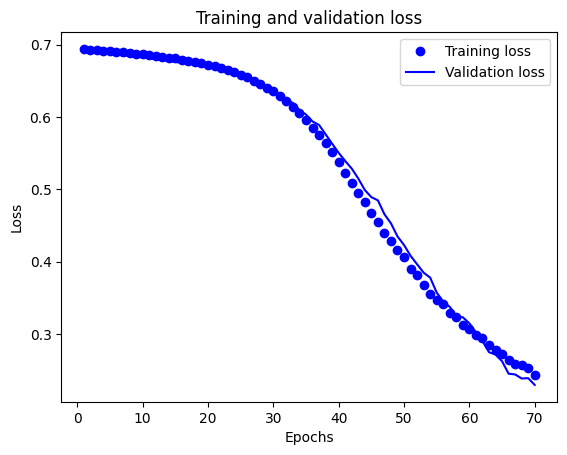

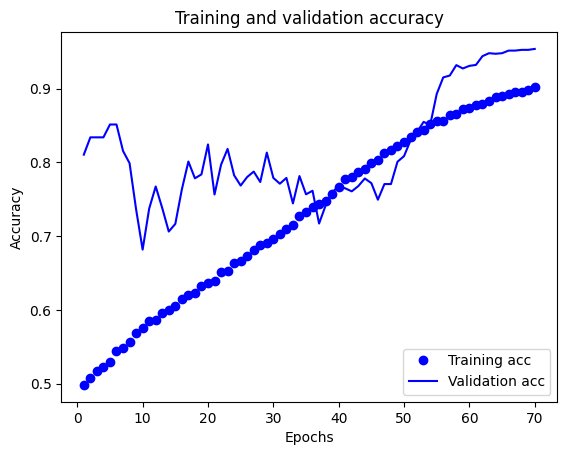


Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1527
           1       1.00      0.91      0.95      2432

    accuracy                           0.95      3959
   macro avg       0.94      0.96      0.94      3959
weighted avg       0.95      0.95      0.95      3959


Confusion Matrix
[[1527    0]
 [ 213 2219]]


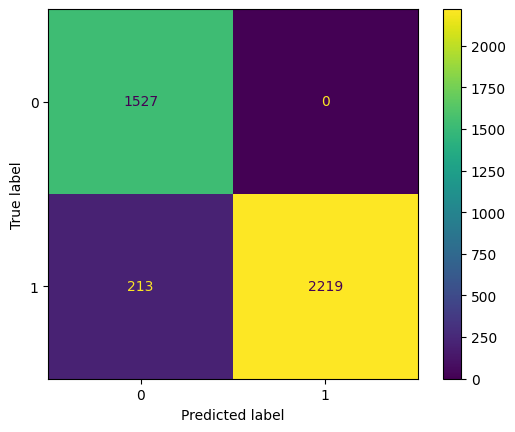

Time taken: 316.3725 seconds


In [ ]:
start_time_1 = time.perf_counter()
with tensorflow.device('/device:GPU:0'):
  # CNN model detection
  # https://keras.io/api/layers/activations/#softmax-function
  detection_model = tensorflow.keras.Sequential([
      tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
      tensorflow.keras.layers.Conv1D(filters=50, kernel_size=3, activation='sigmoid'),
      tensorflow.keras.layers.MaxPooling1D(pool_size=2),
      tensorflow.keras.layers.Dropout(0.3),
      tensorflow.keras.layers.BatchNormalization(),
      tensorflow.keras.layers.LSTM(64),
      tensorflow.keras.layers.Flatten(),
      # 1 layer
      tensorflow.keras.layers.Dense(512, activation='relu'),
      tensorflow.keras.layers.Dropout(0.5),
      # either attack or normal
      tensorflow.keras.layers.Dense(1, activation='sigmoid')
  ])

  detection_model.summary()
  # https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
  sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.001)
  detection_model.compile(optimizer=sgd,
                loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = detection_model.fit(X_rebalance, y_rebalance, batch_size=64, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
  test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

  # Make predictions
  prediction = detection_model.predict(X_test_encode)
  print(prediction)
  attack_prediction = numpy.where(prediction > 0.5, 1, 0)
  print(attack_prediction)
  print(y_test)

  # Evaluate the model
  print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
  # https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
  history_dict = history.history
  # print(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n")

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  print("\nClassification Report")
  print(classification_report(y_test, attack_prediction))

  print("\nConfusion Matrix")
  print(confusion_matrix(y_test, attack_prediction))
  ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
  plt.show()

end_time1 = time.perf_counter()
print(f"Time taken: {end_time1 - start_time_1:0.4f} seconds")

# Optimizing the model
Instead of looking at random number ranges for learning rates, filters, and hidden units, we have encoded specific values.

The hyper parameters we are attempting to optimize are:

*   Batch Size
*   Activation Functions
*   Learning Rates
*   Filters
*   Hidden Units


The base CNN model we made is ingested into *objective_function*.
  This is where our hyper parameters are being considered.
  It returns the Accuracy of that particular iteration.
**LB** and **UB** is set according to the list given above.



In [ ]:
BATCH_ENCODER = LabelEncoder()
BATCH_ENCODER.fit([32, 64, 128])

#act encoder --> Which activation function should be used?
ACT_ENCODER = LabelEncoder()
ACT_ENCODER.fit(['softmax', 'softplus', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'])

#Learning Rate encoder
LR_ENCODER = LabelEncoder()
LR_ENCODER.fit([0.0005, 0.001, 0.005, 0.01, 0.05, 0.1])

#Filter encoder
FILTER_ENCODER = LabelEncoder()
FILTER_ENCODER.fit([25, 50, 75])

#Hidden Units encoder
HIDDEN_ENCODER = LabelEncoder()
HIDDEN_ENCODER.fit([400, 512, 640])

def objective_function(params):
  '''RULES:
      Batch Size - 32, 64, 128
      Activation - softmax, softplus, relu, tanh, sigmoid, hard_sigmoid, linear
      Learning Rate - 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1
      Filters - 25, 50, 75
      Hidden Units - 400, 512, 640
      Dense Layers - 5, 8, 10
  '''
  batch_size = BATCH_ENCODER.inverse_transform([int(params[0])])[0]
  activation = ACT_ENCODER.inverse_transform([int(params[1])])[0]
  learning_rate = LR_ENCODER.inverse_transform([int(params[2])])[0]
  filter = FILTER_ENCODER.inverse_transform([int(params[3])])[0]
  hidden_units = HIDDEN_ENCODER.inverse_transform([int(params[4])])[0]

  model = tensorflow.keras.Sequential()
  model.add(tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1], X_rebalance.shape[2]))),
  model.add(tensorflow.keras.layers.Conv1D(filters=filter, kernel_size=3, activation='sigmoid')),
  model.add(tensorflow.keras.layers.MaxPooling1D(pool_size=2)),
  model.add(tensorflow.keras.layers.Dropout(0.3)),
  model.add(tensorflow.keras.layers.BatchNormalization()),
  model.add(tensorflow.keras.layers.LSTM(64)),
  model.add(tensorflow.keras.layers.Flatten()),
  model.add(tensorflow.keras.layers.Dense(int(hidden_units), activation=activation)),
  model.add(tensorflow.keras.layers.Dropout(0.5)),
  model.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))


  optimizer = tensorflow.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  history = model.fit(X_rebalance, y_rebalance, batch_size=batch_size, epochs=15, validation_data=(X_validation_encode, y_validation_encode), verbose=0)
  min_validation_accuracy = 1-history.history['val_accuracy'][-1]
  print(f"Accuracy {min_validation_accuracy}")
  return min_validation_accuracy

LB = [0, 0, 0, 0, 0]
UB = [2.99, 6.99, 5.99, 2.99, 2.99]

problem_dict = {
    "obj_func": objective_function,
    "bounds": FloatVar(lb=LB, ub=UB),
    "minmax": "min",
    "verbose": True
}

model = LCO.OriginalLCO(epoch=15, pop_size=20)
g_best = model.solve(problem_dict)
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")
model.history.save_global_objectives_chart(filename="garage_door_lco/goc")
model.history.save_local_objectives_chart(filename="garage_door_lco/loc")

model.history.save_global_best_fitness_chart(filename="garage_door_lco/gbfc")
model.history.save_local_best_fitness_chart(filename="garage_door_lco/lbfc")

model.history.save_runtime_chart(filename="garage_door_lco/rtc")

model.history.save_exploration_exploitation_chart(filename="garage_door_lco/eec")

model.history.save_diversity_chart(filename="garage_door_lco/dc")

INFO:mealpy.human_based.LCO.OriginalLCO:Solving single objective optimization problem.


Accuracy 0.38494569063186646
Accuracy 0.22480422258377075
Accuracy 0.5991412103176117
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.06996715068817139
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.05834805965423584
Accuracy 0.024501144886016846
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.22758275270462036
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.10911846160888672
Accuracy 0.21596360206604004
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.23793888092041016
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0


INFO:mealpy.human_based.LCO.OriginalLCO:>>>Problem: P, Epoch: 1, Current best: 0.0, Global best: 0.0, Runtime: 1694.66252 seconds


Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.06769388914108276
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0


INFO:mealpy.human_based.LCO.OriginalLCO:>>>Problem: P, Epoch: 2, Current best: 0.0, Global best: 0.0, Runtime: 2032.43361 seconds


Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.024501144886016846
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.02475374937057495
Accuracy 0.0


INFO:mealpy.human_based.LCO.OriginalLCO:>>>Problem: P, Epoch: 3, Current best: 0.0, Global best: 0.0, Runtime: 1468.67607 seconds


Accuracy 0.057842910289764404
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0


INFO:mealpy.human_based.LCO.OriginalLCO:>>>Problem: P, Epoch: 4, Current best: 0.0, Global best: 0.0, Runtime: 1812.22247 seconds


Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0


INFO:mealpy.human_based.LCO.OriginalLCO:>>>Problem: P, Epoch: 5, Current best: 0.0, Global best: 0.0, Runtime: 1526.56879 seconds


Accuracy 0.0
Accuracy 0.10381406545639038
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.29578179121017456
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0


INFO:mealpy.human_based.LCO.OriginalLCO:>>>Problem: P, Epoch: 6, Current best: 0.0, Global best: 0.0, Runtime: 1909.68557 seconds


Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.024501144886016846
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0


INFO:mealpy.human_based.LCO.OriginalLCO:>>>Problem: P, Epoch: 7, Current best: 0.0, Global best: 0.0, Runtime: 1510.14946 seconds


Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.09598386287689209
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0


INFO:mealpy.human_based.LCO.OriginalLCO:>>>Problem: P, Epoch: 8, Current best: 0.0, Global best: 0.0, Runtime: 1915.45652 seconds


Accuracy 0.0
Accuracy 0.001262962818145752
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0


INFO:mealpy.human_based.LCO.OriginalLCO:>>>Problem: P, Epoch: 9, Current best: 0.0, Global best: 0.0, Runtime: 1692.87093 seconds


Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.024501144886016846
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.18868398666381836
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0


INFO:mealpy.human_based.LCO.OriginalLCO:>>>Problem: P, Epoch: 10, Current best: 0.0, Global best: 0.0, Runtime: 1513.74901 seconds


Accuracy 0.2647132873535156
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.19727206230163574
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.024501144886016846


INFO:mealpy.human_based.LCO.OriginalLCO:>>>Problem: P, Epoch: 11, Current best: 0.0, Global best: 0.0, Runtime: 1888.64291 seconds


Accuracy 0.0
Accuracy 0.024501144886016846
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0


INFO:mealpy.human_based.LCO.OriginalLCO:>>>Problem: P, Epoch: 12, Current best: 0.0, Global best: 0.0, Runtime: 1963.62916 seconds


Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.024501144886016846
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0


INFO:mealpy.human_based.LCO.OriginalLCO:>>>Problem: P, Epoch: 13, Current best: 0.0, Global best: 0.0, Runtime: 1638.17947 seconds


Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.10760295391082764
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.2581459879875183
Accuracy 0.0
Accuracy 0.0
Accuracy 0.38494569063186646


INFO:mealpy.human_based.LCO.OriginalLCO:>>>Problem: P, Epoch: 14, Current best: 0.0, Global best: 0.0, Runtime: 1386.85834 seconds


Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.2818893790245056
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0


INFO:mealpy.human_based.LCO.OriginalLCO:>>>Problem: P, Epoch: 15, Current best: 0.0, Global best: 0.0, Runtime: 1888.98170 seconds


Accuracy 0.0
Solution: [1.01683223 0.65925473 4.43897274 0.24241523 2.93740258], Fitness: 0.0
Solution: [1.01683223 0.65925473 4.43897274 0.24241523 2.93740258], Fitness: 0.0


Solution: [1.01683223 0.65925473 4.43897274 0.24241523 2.93740258], Fitness: 0.0


Batch Size - 32, **64**, 128

Activation - **softmax**, softplus, relu, tanh, sigmoid, hard_sigmoid, linear

Learning Rate - 0.0005, 0.001, 0.005, 0.01, **0.05**, 0.1

Filters - **25**, 50, 75

Hidden Units - 400, 512, **640**

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2, 25)          │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 25)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 25)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 25)          │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        23,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 640)            │        41,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           641 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,481 (255.79 KB)

 Trainable params: 65,431 (255.59 KB)

 Non-trainable params: 50 (200.00 B)

Epoch 1/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.6151 - val_loss: 0.6931
Epoch 2/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4977 - loss: 0.6932 - val_accuracy: 0.6151 - val_loss: 0.6920
Epoch 3/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5019 - loss: 0.6932 - val_accuracy: 0.6151 - val_loss: 0.6911
Epoch 4/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4979 - loss: 0.6932 - val_accuracy: 0.6151 - val_loss: 0.6922
Epoch 5/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5015 - loss: 0.6932 - val_accuracy: 0.3849 - val_loss: 0.6970
Epoch 6/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5019 - loss: 0.6932 - val_accuracy: 0.3849 - val_loss: 0.6934
Epoch 7/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5041 - loss: 0.6931 - val_accuracy: 0.6151 - val_loss: 0.6927
Epoch 8/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5050 - loss: 0.6931 - val_accuracy: 0.

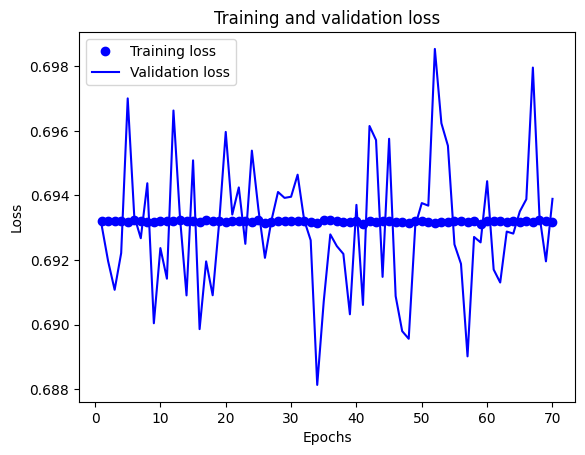

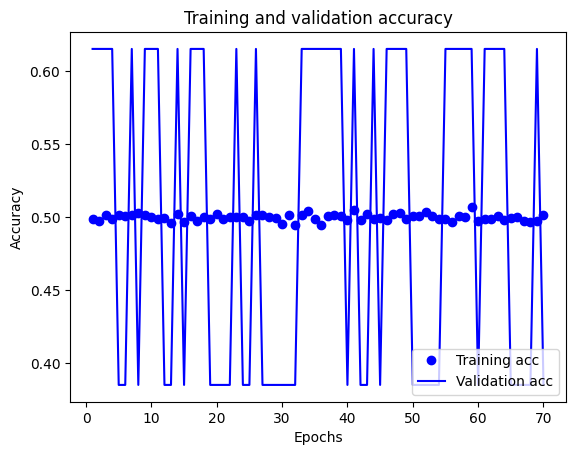


Classification Report
              precision    recall  f1-score   support

           0       0.39      1.00      0.56      1527
           1       0.00      0.00      0.00      2432

    accuracy                           0.39      3959
   macro avg       0.19      0.50      0.28      3959
weighted avg       0.15      0.39      0.21      3959


Confusion Matrix
[[1527    0]
 [2432    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


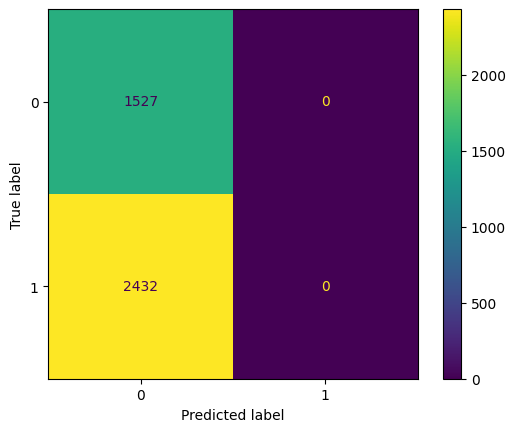

Time taken: 304.3187 seconds


In [ ]:
start_time_2 = time.perf_counter()
with tensorflow.device('/device:GPU:0'):
  # CNN model detection
  # https://keras.io/api/layers/activations/#softmax-function
  detection_model = tensorflow.keras.Sequential([
      tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
      tensorflow.keras.layers.Conv1D(filters=25, kernel_size=3, activation='sigmoid'),
      tensorflow.keras.layers.MaxPooling1D(pool_size=2),
      tensorflow.keras.layers.Dropout(0.3),
      tensorflow.keras.layers.BatchNormalization(),
      tensorflow.keras.layers.LSTM(64),
      tensorflow.keras.layers.Flatten(),
      # 1 layer
      tensorflow.keras.layers.Dense(640, activation='softmax'),
      tensorflow.keras.layers.Dropout(0.5),
      # either attack or normal
      tensorflow.keras.layers.Dense(1, activation='sigmoid')
  ])

  detection_model.summary()
  # https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
  sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.05)
  detection_model.compile(optimizer=sgd,
                loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = detection_model.fit(X_rebalance, y_rebalance, batch_size=64, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
  test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

  # Make predictions
  prediction = detection_model.predict(X_test_encode)
  print(prediction)
  attack_prediction = numpy.where(prediction > 0.5, 1, 0)
  print(attack_prediction)
  print(y_test)

  # Evaluate the model
  print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
  # https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
  history_dict = history.history
  # print(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n")

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  print("\nClassification Report")
  print(classification_report(y_test, attack_prediction))

  print("\nConfusion Matrix")
  print(confusion_matrix(y_test, attack_prediction))
  ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
  plt.show()

end_time2 = time.perf_counter()
print(f"Time taken: {end_time2 - start_time_2:0.4f} seconds")